# How do I work?

This notebook contains my whole process and approach to the taskset given to me.

## 1. Mongodb

Existing knowledge: it is a database

First I googled the most generic question and was led to https://www.mongodb.com/what-is-mongodb
Before exploring further I refined my search to:
* Google - mongodb in 5 minutes?
    1. MongoDB in 5 Minutes with Eliot Horowitz:
        https://www.youtube.com/watch?v=EE8ZTQxa0AM&ab_channel=MongoDB
    2. MongoDB in 100 Seconds:
        https://www.youtube.com/watch?v=-bt_y4Loofg&ab_channel=Fireship

It reminded me of Firestore which I have worked a bit with
* ChatGpt:
    1. are mongodb and firebase the same type of db?
    2. comparison between firestore and mongo db (structure, features, usability)
    3. how are the two similar?

Retrun to  https://www.mongodb.com/what-is-mongodb and begin of exploration with the cloud version

![Cloud vs Srver options to try MongoDB](./images/mongo-choice.png)


ChatGpt: what is the difference between using MongoDB atlas and having a server

### Installation

Google - how to install mongodb on fedora 38:

    * https://idroot.us/install-mongodb-fedora-38/
    * https://developer.fedoraproject.org/tech/database/mongodb/about.html

### Introduction
ChatGpt:
i have now successfully installed mongodb on my machine
i have never used it
can you guide me through some foundational steps?
something short and fun to teach me how to use mongodb

Using the MongoDB shell

* how to list all databases - show dbs

* on a personal computer which is running fedora can i have different MongoDB servers? and should I

* how to see what's inside a db? - use DBname to + show collections

### Use Python to get data from the db

pip install pymongo


In [2]:
from pymongo import MongoClient

client = MongoClient('localhost', 27017)
db = client.myFirstDB
collection = db.myFirstCollection
items = collection.find()
key_val_paris = [f"{key}: {val}" for item in items for key, val in item.items()]

In [3]:
key_val_paris

['_id: 64819fe795d5dcc12cf76422',
 'name: maybe',
 'age: 69',
 'status: less broken',
 '_id: 6481a05795d5dcc12cf76423',
 'other: whaaat']

# 2. Docker

* install docker
* docker pull mongo - get the mongo image
* docker run --name mongo_the_first -d -p 27018:27017 mongo


Had to use 27018 because my local MongoDB server was using 27017 and I did not want to shut it down


In [6]:
second_client = MongoClient('localhost', 27018)

second_db = second_client.myFirstDockerDB
second_collection = second_db.myFirstDockerDBCollection
print("from docker")
print(second_collection.find_one())

from docker
{'_id': ObjectId('6481ad9fff6b56638a0ac69f'), 'name': 'Krisi', 'age': 'yes', 'sings': 'for pleasure'}


# 3. Load data into MongoDB

In [7]:
import pandas as pd

In [8]:
file1 = pd.read_csv('data/Turbine2.csv', delimiter=";")
file1.head()

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,Abgabe,Bezug,KH-Zähl1,KH-Zähl2,KH-DigiE,KH-DigiI,KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4
0,,m/s,rpm,kW,°,kWh,kWh,h,h,°C,...,kWh,kWh,Imp,Imp,Bit,Bit,,,,
1,"01.01.2016, 00:10","4,2",10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",...,0,0,0,0,0,0,0,0,0,0
2,"01.01.2016, 00:20","4,2",10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",...,0,0,0,0,0,0,0,0,0,0
3,"01.01.2016, 00:30","4,4",10,"162,1","160,8",33270717,1712059,48925,45171,14,...,0,0,0,0,0,0,0,0,0,0
4,"01.01.2016, 00:40","5,4",10,"265,1","161,3",33270717,1712105,48925,45171,"14,8",...,0,0,0,0,0,0,0,0,0,"0,"


In [9]:
file1.shape #checking if all rows loaded)

(13104, 31)

In [10]:
file1.isna().value_counts() #checking for n/a values

         Dat/Zeit    Wind  Rotor  Leistung  Azimut     Prod. 1     Prod. 2  BtrStd 1  BtrStd 2  Gen1-  Lager  Außen  GetrT   Status  Spann  Spann.1  Spann.2  Strom-  Strom-.1  Strom-.2  CosPh      Abgabe       Bezug    KH-Zähl1    KH-Zähl2    KH-DigiE    KH-DigiI    KH-Ana-1    KH-Ana-2    KH-Ana-3    KH-Ana-4
False              False   False  False     False   False       False       False     False     False  False  False  False  False    False  False    False    False   False     False     False  False       False       False       False       False       False       False       False       False       False         13104
Name: count, dtype: int64

In [11]:
file1.columns = file1.columns.str.strip() #removing white spaces at front and end

In [12]:
for col in file1.columns:
#     print(col.strip())
    print(file1[col].isna().value_counts())

Dat/Zeit
False    13104
Name: count, dtype: int64
Wind
False    13104
Name: count, dtype: int64
Rotor
False    13104
Name: count, dtype: int64
Leistung
False    13104
Name: count, dtype: int64
Azimut
False    13104
Name: count, dtype: int64
Prod. 1
False    13104
Name: count, dtype: int64
Prod. 2
False    13104
Name: count, dtype: int64
BtrStd 1
False    13104
Name: count, dtype: int64
BtrStd 2
False    13104
Name: count, dtype: int64
Gen1-
False    13104
Name: count, dtype: int64
Lager
False    13104
Name: count, dtype: int64
Außen
False    13104
Name: count, dtype: int64
GetrT
False    13104
Name: count, dtype: int64
Status
False    13104
Name: count, dtype: int64
Spann
False    13104
Name: count, dtype: int64
Spann.1
False    13104
Name: count, dtype: int64
Spann.2
False    13104
Name: count, dtype: int64
Strom-
False    13104
Name: count, dtype: int64
Strom-.1
False    13104
Name: count, dtype: int64
Strom-.2
False    13104
Name: count, dtype: int64
CosPh
False    13104
Name: count

In [13]:
file1.iloc[0] = file1.iloc[0].str.strip() #removing white spaces in row zero - the metrics

In [14]:
file1.iloc[0]

Dat/Zeit       
Wind        m/s
Rotor       rpm
Leistung     kW
Azimut        °
Prod. 1     kWh
Prod. 2     kWh
BtrStd 1      h
BtrStd 2      h
Gen1-        °C
Lager        °C
Außen        °C
GetrT        °C
Status         
Spann         V
Spann.1       V
Spann.2       V
Strom-        A
Strom-.1      A
Strom-.2      A
CosPh          
Abgabe      kWh
Bezug       kWh
KH-Zähl1    Imp
KH-Zähl2    Imp
KH-DigiE    Bit
KH-DigiI    Bit
KH-Ana-1       
KH-Ana-2       
KH-Ana-3       
KH-Ana-4       
Name: 0, dtype: object

In [15]:
file1.columns = [name if metric == '' else f"{name} ({metric})" 
             for name, metric in zip(file1.columns, file1.iloc[0])]
file1.columns

Index(['Dat/Zeit', 'Wind (m/s)', 'Rotor (rpm)', 'Leistung (kW)', 'Azimut (°)',
       'Prod. 1 (kWh)', 'Prod. 2 (kWh)', 'BtrStd 1 (h)', 'BtrStd 2 (h)',
       'Gen1- (°C)', 'Lager (°C)', 'Außen (°C)', 'GetrT (°C)', 'Status',
       'Spann (V)', 'Spann.1 (V)', 'Spann.2 (V)', 'Strom- (A)', 'Strom-.1 (A)',
       'Strom-.2 (A)', 'CosPh', 'Abgabe (kWh)', 'Bezug (kWh)',
       'KH-Zähl1 (Imp)', 'KH-Zähl2 (Imp)', 'KH-DigiE (Bit)', 'KH-DigiI (Bit)',
       'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', 'KH-Ana-4'],
      dtype='object')

In [16]:
for col in file1.columns:
    print(col)

Dat/Zeit
Wind (m/s)
Rotor (rpm)
Leistung (kW)
Azimut (°)
Prod. 1 (kWh)
Prod. 2 (kWh)
BtrStd 1 (h)
BtrStd 2 (h)
Gen1- (°C)
Lager (°C)
Außen (°C)
GetrT (°C)
Status
Spann (V)
Spann.1 (V)
Spann.2 (V)
Strom- (A)
Strom-.1 (A)
Strom-.2 (A)
CosPh
Abgabe (kWh)
Bezug (kWh)
KH-Zähl1 (Imp)
KH-Zähl2 (Imp)
KH-DigiE (Bit)
KH-DigiI (Bit)
KH-Ana-1
KH-Ana-2
KH-Ana-3
KH-Ana-4


In [17]:
file1.drop(0, inplace=True)

In [18]:
file1.head()

,Dat/Zeit,Wind (m/s),Rotor (rpm),Leistung (kW),Azimut (°),Prod. 1 (kWh),Prod. 2 (kWh),BtrStd 1 (h),BtrStd 2 (h),Gen1- (°C),...,Abgabe (kWh),Bezug (kWh),KH-Zähl1 (Imp),KH-Zähl2 (Imp),KH-DigiE (Bit),KH-DigiI (Bit),KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4
1,"01.01.2016, 00:10","4,2",10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",...,0,0,0,0,0,0,0,0,0,0
2,"01.01.2016, 00:20","4,2",10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",...,0,0,0,0,0,0,0,0,0,0
3,"01.01.2016, 00:30","4,4",10,"162,1","160,8",33270717,1712059,48925,45171,14,...,0,0,0,0,0,0,0,0,0,0
4,"01.01.2016, 00:40","5,4",10,"265,1","161,3",33270717,1712105,48925,45171,"14,8",...,0,0,0,0,0,0,0,0,0,"0,"
5,"01.01.2016, 00:50","5,3",10,"283,8","161,2",33270717,1712147,48925,45172,17,...,0,0,0,0,0,0,0,0,0,"0,,"


In [70]:
DATE = "Dat/Zeit"

In [19]:
def reformat_turbine_csv(df):
    """
    Strips the white spaces from the column names.
    Adds the measurement units to the column names and
    removes row zero containing said units
    """
    df.columns = df.columns.str.strip()
    df.iloc[0] = df.iloc[0].str.strip()
    df.columns = [name if metric == '' else f"{name} ({metric})" 
             for name, metric in zip(df.columns, df.iloc[0])]
    
    df.drop(0, inplace=True)

In [20]:
df = pd.read_csv("data/Turbine2.csv", delimiter=";")
df.head()

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,Abgabe,Bezug,KH-Zähl1,KH-Zähl2,KH-DigiE,KH-DigiI,KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4
0,,m/s,rpm,kW,°,kWh,kWh,h,h,°C,...,kWh,kWh,Imp,Imp,Bit,Bit,,,,
1,"01.01.2016, 00:10","4,2",10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",...,0,0,0,0,0,0,0,0,0,0
2,"01.01.2016, 00:20","4,2",10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",...,0,0,0,0,0,0,0,0,0,0
3,"01.01.2016, 00:30","4,4",10,"162,1","160,8",33270717,1712059,48925,45171,14,...,0,0,0,0,0,0,0,0,0,0
4,"01.01.2016, 00:40","5,4",10,"265,1","161,3",33270717,1712105,48925,45171,"14,8",...,0,0,0,0,0,0,0,0,0,"0,"


In [21]:
reformat_turbine_csv(df)
df.head()

,Dat/Zeit,Wind (m/s),Rotor (rpm),Leistung (kW),Azimut (°),Prod. 1 (kWh),Prod. 2 (kWh),BtrStd 1 (h),BtrStd 2 (h),Gen1- (°C),...,Abgabe (kWh),Bezug (kWh),KH-Zähl1 (Imp),KH-Zähl2 (Imp),KH-DigiE (Bit),KH-DigiI (Bit),KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4
1,"01.01.2016, 00:10","4,2",10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",...,0,0,0,0,0,0,0,0,0,0
2,"01.01.2016, 00:20","4,2",10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",...,0,0,0,0,0,0,0,0,0,0
3,"01.01.2016, 00:30","4,4",10,"162,1","160,8",33270717,1712059,48925,45171,14,...,0,0,0,0,0,0,0,0,0,0
4,"01.01.2016, 00:40","5,4",10,"265,1","161,3",33270717,1712105,48925,45171,"14,8",...,0,0,0,0,0,0,0,0,0,"0,"
5,"01.01.2016, 00:50","5,3",10,"283,8","161,2",33270717,1712147,48925,45172,17,...,0,0,0,0,0,0,0,0,0,"0,,"


In [31]:
df.to_csv('data/Updated_Turbine1.csv', index=False)

In [30]:
type(df['Dat/Zeit'].iloc[0])

str

In [47]:
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%d-%m %H:%M:%S")
formatted_date = pd.read_csv("data/Updated_Turbine1.csv",
                             parse_dates=['Dat/Zeit'],
                             date_parser=custom_date_parser)
formatted_date.head()

/tmp/ipykernel_5146/1754352610.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  formatted_date = pd.read_csv("data/Updated_Turbine1.csv",


NameError: name 'datetime' is not defined

In [56]:
formatted_date = pd.read_csv("data/Updated_Turbine1.csv",
                             parse_dates=['Dat/Zeit'],)
formatted_date['Dat/Zeit'] = pd.to_datetime(formatted_date['Dat/Zeit'], format="%d.%m.%Y, %H:%M")
formatted_date.head()

,Dat/Zeit,Wind (m/s),Rotor (rpm),Leistung (kW),Azimut (°),Prod. 1 (kWh),Prod. 2 (kWh),BtrStd 1 (h),BtrStd 2 (h),Gen1- (°C),...,Abgabe (kWh),Bezug (kWh),KH-Zähl1 (Imp),KH-Zähl2 (Imp),KH-DigiE (Bit),KH-DigiI (Bit),KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4
0,2016-01-01 00:10:00,"4,2",10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",...,0,0,0,0,0,0,0,0,0,0
1,2016-01-01 00:20:00,"4,2",10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",...,0,0,0,0,0,0,0,0,0,0
2,2016-01-01 00:30:00,"4,4",10,"162,1","160,8",33270717,1712059,48925,45171,14,...,0,0,0,0,0,0,0,0,0,0
3,2016-01-01 00:40:00,"5,4",10,"265,1","161,3",33270717,1712105,48925,45171,"14,8",...,0,0,0,0,0,0,0,0,0,"0,"
4,2016-01-01 00:50:00,"5,3",10,"283,8","161,2",33270717,1712147,48925,45172,17,...,0,0,0,0,0,0,0,0,0,"0,,"


In [54]:
og_date = pd.read_csv("data/Updated_Turbine1.csv")
og_date.head()

,Dat/Zeit,Wind (m/s),Rotor (rpm),Leistung (kW),Azimut (°),Prod. 1 (kWh),Prod. 2 (kWh),BtrStd 1 (h),BtrStd 2 (h),Gen1- (°C),...,Abgabe (kWh),Bezug (kWh),KH-Zähl1 (Imp),KH-Zähl2 (Imp),KH-DigiE (Bit),KH-DigiI (Bit),KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4
0,"01.01.2016, 00:10","4,2",10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",...,0,0,0,0,0,0,0,0,0,0
1,"01.01.2016, 00:20","4,2",10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",...,0,0,0,0,0,0,0,0,0,0
2,"01.01.2016, 00:30","4,4",10,"162,1","160,8",33270717,1712059,48925,45171,14,...,0,0,0,0,0,0,0,0,0,0
3,"01.01.2016, 00:40","5,4",10,"265,1","161,3",33270717,1712105,48925,45171,"14,8",...,0,0,0,0,0,0,0,0,0,"0,"
4,"01.01.2016, 00:50","5,3",10,"283,8","161,2",33270717,1712147,48925,45172,17,...,0,0,0,0,0,0,0,0,0,"0,,"


In [57]:
type(df['Dat/Zeit'].iloc[0])

str

In [149]:
df['Dat/Zeit'].dtype

dtype('O')

In [160]:
formatted_date[:2]

,Wind (m/s),Rotor (rpm),Leistung (kW),Azimut (°),Prod. 1 (kWh),Prod. 2 (kWh),BtrStd 1 (h),BtrStd 2 (h),Gen1- (°C),Lager (°C),...,Abgabe (kWh),Bezug (kWh),KH-Zähl1 (Imp),KH-Zähl2 (Imp),KH-DigiE (Bit),KH-DigiI (Bit),KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4
Dat/Zeit,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:10:00,4.2,10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",51,...,0,0,0,0,0,0,0,0,0,0
2016-01-01 00:20:00,4.2,10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",51,...,0,0,0,0,0,0,0,0,0,0


In [101]:
formatted_date['Dat/Zeit'].dt.strftime('%d-%m-%Y')

0        01-01-2016
1        01-01-2016
2        01-01-2016
3        01-01-2016
4        01-01-2016
            ...    
13098    31-03-2016
13099    31-03-2016
13100    31-03-2016
13101    31-03-2016
13102    31-03-2016
Name: Dat/Zeit, Length: 13103, dtype: object

In [148]:
formatted_date[DATE]


KeyError: 'Dat/Zeit'

In [66]:
print(formatted_date[DATE].min())
print(formatted_date[DATE].max())


2016-01-01 00:10:00
2016-03-31 23:50:00


<Axes: xlabel='Dat/Zeit'>

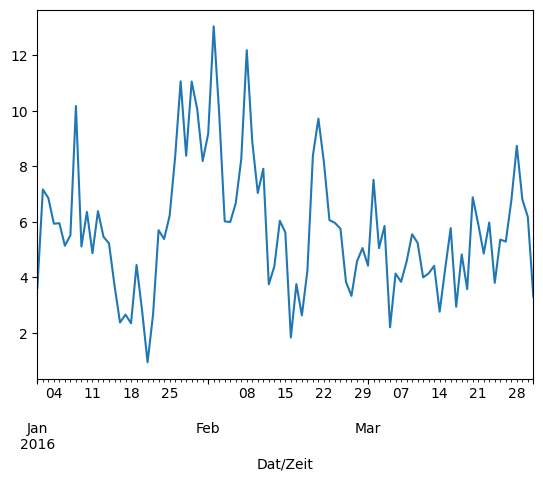

In [146]:
daily_df = formatted_date["Wind (m/s)"].resample('D').mean()
daily_df.plot(y="Wind (m/s)")

In [115]:
formatted_date["Wind (m/s)"] = formatted_date["Wind (m/s)"].str.replace(',', '.').astype(float)

In [138]:
formatted_date.head()
formatted_date.set_index(DATE, inplace=True)

In [113]:
formatted_date["Lager (°C)"].str.replace(',', '.').astype(float)

0        51.0
1        51.0
2        51.1
3        52.2
4        53.0
         ... 
13098    54.1
13099    54.7
13100    54.1
13101    54.3
13102    54.8
Name: Lager (°C), Length: 13103, dtype: float64

In [135]:
print(df[DATE].min())
print(df[DATE].max())


01.01.2016, 00:10
31.03.2016, 23:50


In [161]:
formatted_date.head()

,Wind (m/s),Rotor (rpm),Leistung (kW),Azimut (°),Prod. 1 (kWh),Prod. 2 (kWh),BtrStd 1 (h),BtrStd 2 (h),Gen1- (°C),Lager (°C),...,Abgabe (kWh),Bezug (kWh),KH-Zähl1 (Imp),KH-Zähl2 (Imp),KH-DigiE (Bit),KH-DigiI (Bit),KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4
Dat/Zeit,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:10:00,4.2,10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",51,...,0,0,0,0,0,0,0,0,0,0
2016-01-01 00:20:00,4.2,10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",51,...,0,0,0,0,0,0,0,0,0,0
2016-01-01 00:30:00,4.4,10,"162,1","160,8",33270717,1712059,48925,45171,14,"51,1",...,0,0,0,0,0,0,0,0,0,0
2016-01-01 00:40:00,5.4,10,"265,1","161,3",33270717,1712105,48925,45171,"14,8","52,2",...,0,0,0,0,0,0,0,0,0,"0,"
2016-01-01 00:50:00,5.3,10,"283,8","161,2",33270717,1712147,48925,45172,17,53,...,0,0,0,0,0,0,0,0,0,"0,,"


In [164]:
formatted_date.loc["2016-03-08 02:20:00"]

Wind (m/s)             3.6
Rotor (rpm)             10
Leistung (kW)         75,8
Azimut (°)           232,8
Prod. 1 (kWh)     33978760
Prod. 2 (kWh)      1786851
BtrStd 1 (h)         49829
BtrStd 2 (h)         45673
Gen1- (°C)              10
Lager (°C)              49
Außen (°C)               3
GetrT (°C)              40
Status                   0
Spann (V)            400,5
Spann.1 (V)          400,4
Spann.2 (V)          399,4
Strom- (A)            58,7
Strom-.1 (A)          72,2
Strom-.2 (A)          62,2
CosPh                0,971
Abgabe (kWh)          1198
Bezug (kWh)             21
KH-Zähl1 (Imp)           0
KH-Zähl2 (Imp)           0
KH-DigiE (Bit)           0
KH-DigiI (Bit)           0
KH-Ana-1                 0
KH-Ana-2                 0
KH-Ana-3                 0
KH-Ana-4            0,,,,,
Name: 2016-03-08 02:20:00, dtype: object